<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1-Загрузка-и-изучение-данных" data-toc-modified-id="1-Загрузка-и-изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1 Загрузка и изучение данных</a></span><ul class="toc-item"><li><span><a href="#Вывод-1" data-toc-modified-id="Вывод-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод 1</a></span></li></ul></li><li><span><a href="#2.-Умножение-матриц" data-toc-modified-id="2.-Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Вывод-2" data-toc-modified-id="Вывод-2-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод 2</a></span></li></ul></li><li><span><a href="#3-Алгоритм-преобразования-данных" data-toc-modified-id="3-Алгоритм-преобразования-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3 Алгоритм преобразования данных</a></span><ul class="toc-item"><li><span><a href="#Вывод-3" data-toc-modified-id="Вывод-3-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод 3</a></span></li></ul></li><li><span><a href="#4-Проверка-алгоритма" data-toc-modified-id="4-Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>4 Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#4.1-Подготовим-данные" data-toc-modified-id="4.1-Подготовим-данные-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>4.1 Подготовим данные</a></span></li><li><span><a href="#4.2-Сравнение-качества-линейной-регрессии-до-и-после-шифрования-(применим-метрику-R2)." data-toc-modified-id="4.2-Сравнение-качества-линейной-регрессии-до-и-после-шифрования-(применим-метрику-R2).-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>4.2 Сравнение качества линейной регрессии до и после шифрования (применим метрику R2).</a></span></li><li><span><a href="#Вывод-4" data-toc-modified-id="Вывод-4-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Вывод 4</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.  

**Описание данных:**

**Признаки**: пол, возраст и зарплата застрахованного, количество членов его семьи.   
**Целевой признак**: количество страховых выплат клиенту за последние 5 лет.

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns

import math

import os

In [2]:
RS=42

## 1 Загрузка и изучение данных

In [3]:
# Загружаем данные
pth1 = '/datasets/insurance.csv'
pth2 = 'insurance.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
    
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
    
else:
    print('Ошибка загрузки данных, проверьте правильность пути, наличие файла')

In [4]:
# Выводим несколько первых и последних строк данных 
display(df.head(), df.tail())

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0
4999,1,28.0,40600.0,1,0


In [5]:
# Общая информация о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
# Статистики данных
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [7]:
# Проверим наличие явных дубликатов
d = df.duplicated().sum()

In [8]:
# Доля явных дубликатов
d = round(100*d/len(df),2)
print(f' Доля явных дуликатов: {d}%')

 Доля явных дуликатов: 3.06%


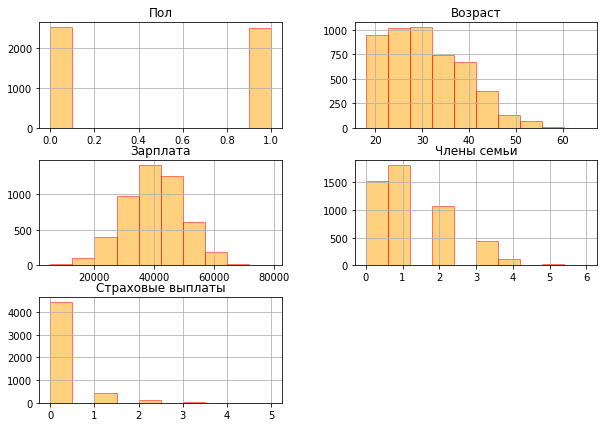

In [9]:
df.hist(figsize=(10, 7), alpha=0.5, color='orange', ec='red')
plt.show()

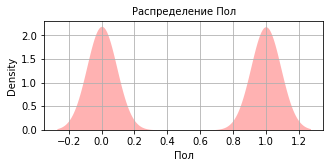

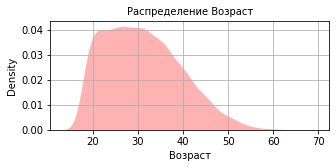

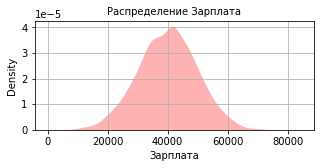

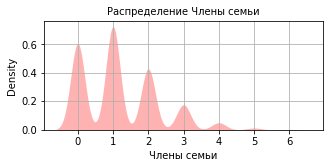

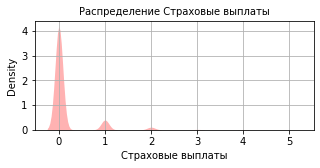

In [10]:
# Графики распределений
col_names = df.columns.tolist() # список наименований колонок
list(map(lambda x: [plt.figure(figsize=(5,2)), \
                    sns.kdeplot(data=df[x], color='red', fill= True , alpha= .3 , linewidth= 0, ec='blue'), \
                    plt.grid(),  \
                    plt.title(f'Распределение {x}', \
                    fontsize=10), plt.show()], col_names))
plt.show()

In [11]:
# Функция построения boxplot для признаков, на входе - список признаков, каждый в кавычках
def boxes_pl(feature):
    try:
        list(map(lambda x: [df[x].plot.box(figsize=(5,2), grid=True, vert=False),  \
                            plt.title(f'Диаграмма размаха {x}',fontsize=10), \
                            plt.xlabel(f'{x}',fontsize=10), \
                            plt.show()], feature))
    except: 
        print('Ошибка, проверьте, что feature - список признаков, каждый в кавычках')

In [12]:
col_names=col_names.remove('Пол')

In [13]:
# Строим графики 'Ящик с усами' для признаков
boxes_pl(col_names)

Ошибка, проверьте, что feature - список признаков, каждый в кавычках


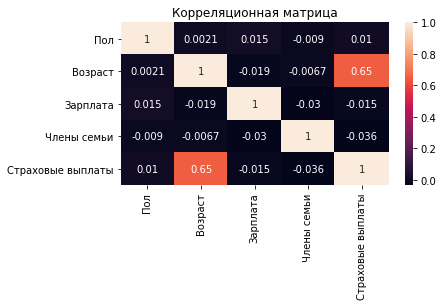

In [14]:
# Тепловая карта матрицы корреляции
fig = plt.figure(figsize=(6, 3))
sns.heatmap(df.corr(), annot=True)
plt.title('Корреляционная матрица')
plt.show()

### Вывод 1  

В данных 5000 объектов и 5 признаков их описывающих.  
Заголовки колонок и содержание данных корректны.  
Признаки в данных количественные (признак Пол имеет тип (int) и значения (0, 1), характерные для количественных признаков, кодировать в таком виде его не имеет смысла, хоть он и относится к качественным по смыслу).   
Большинство признаков распределены ненормально, есть выбросы.  
Пропусков нет.    
Тип данных приемлем для дальнейшего анализа, однако, для удобства заменим вещественный на целый тип данных.
Мультиколлинеарных признаков нет.
Средняя корреляция с целевым у признака Возраст (0,65).

Явных дубликатов 153 шт - это незначительные 3%, которые удалим.  
Дубликаты возникли, возможно, при некорректной работе с данными при выгрузках из базы данных, обновлениях и прочее. 

## 2. Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** При умножении матрицы признаков на обратимую матрицу качество линейной регрессии не изменится.

**Обоснование:**   
Качество модели зависит от предсказания модели (например, R2 для рассматриваемой задачи), в нашем случае это вектор a.  
Покажем, что вектор a не изменится, если умножить матрицу признаков справа на обратимую матрицу.  
Пусть a' - преобразованный вектор предсказания после умноженя матрицы признаков X на обратимую матрицу P.  
Покажем, что а' = а.  

После преобразования а' примет вид:  
$$
а' = X'w'
$$  
Произведем замену:  
$$
X' = XP
$$  
Тогда 
$$
а' = XP[(XP)^T XP]^{-1} (XP)^T y
$$  
Используя свойства матриц: 
$$
(AB)^T = B^TA^T 
$$
$$
(AB)^{-1} = B^{-1}A^{-1}
$$
$$
(A^T)^{-1} = (A^{-1})^T
$$
$$
(AB)C = A(BC)
$$
$$
A^{-1}A = E 
$$
$$
AE = EA = A 
$$
(где E - единичная матрица)

Преобразуем выражение:  
$$
а' = XP[(XP)^T XP]^{-1} (XP)^T y = 
$$  

$$
= XP[P^T(X^TXP)]^{-1}P^TX^T y = 
$$

$$
= XP[(X^TX)P]^{-1}(P^T)^{-1} P^TX^T y = 
$$  

$$
= XPP^{-1}(X^TX)^{-1}EX^T y = 
$$  

$$
= XEX^TX^{-1}EX^T y = 
$$

$$
= X(X^TX)^{-1}X^T y = Xw = a
$$ 

$$
=> a' = a
$$ 

### Вывод 2
Так как качество модели зависит от вектора предсказаний, сравнили его до и после преобразования матрицы признаков, в котором домножали ее справа на обратимую матрицу.  
Доказали, что векторы предсказаний до и после преобразования совпадают, следовательно, при умножении матрицы признаков на обратимую матрицу качество линейной регрессии не изменится.

## 3 Алгоритм преобразования данных

**Алгоритм**

1. Создадим обратную матрицу.
2. Проверим ее обратимость.
3. Умножим ее на матрицу признаков X.
4. Посмотрим результат преобразования - изменлись ли признаки.
5. Построим модель линейной регрессии и сравним ее качество R2 до и после преобразования матрицы признаков.

**Обоснование**  

Для шифрования данных можем использовать умножение матрицы признаков X размерности **mxn** на обратимую матрицу P соответствующей размерности **nxn** (обратная матрица должна быть квадратной), где **n** - количество признаков в матрице X.  

Преобразованная матрица признаков C получится той же размерности, что и исходная X.
$$
X_(mn)*P_(nn) = С_(mn)
$$
Ключ для дешифрования данных будет матрица, обратная к P:
$$
XP = С => 
$$
$$
XPP^{-1} = CP^{-1} => 
$$
$$
XE = CP^{-1} =>
$$
$$
X = CP^{-1}
$$
Качество модели, как мы показали выше, не поменяется, а признаки примут другие значения - зашифруются. 

### Вывод 3  
Описали алгоритм преобразования данных.  
Он включает в себя генерацию обратимой матрицы, проверку ее обратимости и корректного шифрования признаков, построение линейной регрессии и сравнения метрики R2 до и после преобразования матрицы признаков.

## 4 Проверка алгоритма

### 4.1 Подготовим данные

In [15]:
# Удалим явные дубликаты
df = df.drop_duplicates(ignore_index=True)

In [16]:
# Преобразуем тип данных
df = df.astype(int)

In [16]:
# Проверяем удаление
df.info() 
print(f'\n Дубликатов после удаления:{df.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                4847 non-null   int64  
 1   Возраст            4847 non-null   float64
 2   Зарплата           4847 non-null   float64
 3   Члены семьи        4847 non-null   int64  
 4   Страховые выплаты  4847 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 189.5 KB

 Дубликатов после удаления:0


In [17]:
# Отделим признаки от целевого
y = df['Страховые выплаты']
X = df.drop('Страховые выплаты', axis=1)

In [18]:
# Проверяем целевой признак после выделения из данных
display(pd.DataFrame(y.head(2)), pd.DataFrame(y.tail(2)))

,Страховые выплаты
0,0
1,1


,Страховые выплаты
4845,0
4846,0


In [19]:
display(X.head(2), X.tail(2))

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1


,Пол,Возраст,Зарплата,Члены семьи
4845,1,22.0,32700.0,3
4846,1,28.0,40600.0,1


In [20]:
# Функция шифрования матрицы признаков, которая генерирует случайную матрицу,
# проверяя ее на обратимость, и домножает на нее исходную матрицу признаков.
# На входе - исходная матрица признаков.
# На выходе - зашифрованная матрица признаков и матрица для дешифрования.
def cipher(features):
    m = len(features.columns)
    try:
        P = np.random.normal(size=(m, m)) # генерируем случайную квадратную матрицу нужного размера
        key_cipher = np.linalg.inv(P)  # находим обратную матрицу для P - ключ для дешифрования признаков 
        if (np.linalg.det(key_cipher) != 0):
            X_cipher = X.values @ P
        else:
            print('Оприделитель 0')
    except:
        print('Ошибка. Возможно, матрица не является обратимой')  #если матрица необратима, будет обнаружена ошибка
        
    return P, X_cipher, key_cipher

In [21]:
# Получаем шифрованные данные
P, X_cipher, key_cipher = cipher(X)

In [22]:
X_cipher = pd.DataFrame(X_cipher)

In [23]:
# Проверяем шифрование признаков
print(' Преобразованная (зашифрованная) матрица признаков X_cipher:'), display(X_cipher)
print(' Обратимая матрица P:') , display(pd.DataFrame(P))
print(' Ключ дешифрования key_cipher:'), display(pd.DataFrame(key_cipher))


 Преобразованная (зашифрованная) матрица признаков X_cipher:


,0,1,2,3
0,2876.309347,-74163.366848,-60378.471628,18057.503296
1,2211.529979,-56816.627962,-46274.985776,13833.826093
2,1224.991999,-31397.654966,-25576.098877,7645.603306
3,2407.191956,-62354.405372,-50750.463208,15177.773271
4,1518.869333,-39023.883570,-31777.016980,9503.915418
...,...,...,...,...
4842,2066.926910,-53381.068790,-43459.314138,12994.647681
4843,3031.222329,-78351.826212,-63778.864481,19073.745939
4844,1958.416559,-50690.771237,-41261.194108,12338.829559
4845,1891.247165,-48896.461574,-39803.099945,11903.970018


 Обратимая матрица P:


,0,1,2,3
0,1.500298,0.272646,1.839574,2.223854
1,0.636717,0.168656,-1.066862,0.087173
2,0.057454,-1.495359,-1.216436,0.363956
3,-0.998712,-0.731493,-1.335108,-0.510581


 Ключ дешифрования key_cipher:


,0,1,2,3
0,-0.456964,0.287252,0.666352,-1.466288
1,0.313765,0.603925,-0.935990,0.802528
2,-0.153927,-0.648475,0.208287,-0.632679
3,0.846816,0.268586,-0.507089,1.414177


(None, None)

In [24]:
# Проверим дешифрование
X_decipher = X_cipher  @ key_cipher

In [25]:
# Матрица исходных признаков, полученная после дешифрованя
X_decipher

,0,1,2,3
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,-2.100858e-12,46.0,38000.0,1.000000e+00
2,-9.489107e-14,29.0,21000.0,1.915206e-12
3,1.268437e-12,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,1.350779e-12
...,...,...,...,...
4842,8.625696e-13,28.0,35700.0,2.000000e+00
4843,-3.301556e-12,34.0,52400.0,1.000000e+00
4844,1.872466e-15,20.0,33900.0,2.000000e+00
4845,1.000000e+00,22.0,32700.0,3.000000e+00


In [26]:
#Ввиду особенностей обработки вещественных чисел в Python получились очень маленькие (степени -11) отрицатетльные значения,
# при округлении которых останутся нули с минусами, уберем их и преобразуем массив дешифрованной матрицы в таблицу
#X_decipher[X_decipher < 0 ] *= -1 
print('Таблица дешифрованных признаков')
X_decipher = round(X_decipher,0)
X_decipher = X_decipher.astype(int)
X_decipher = pd.DataFrame(X_decipher)
X_decipher.columns=['Пол', 'Возраст', 'Зарплата', 'Члены семьи']
display(X_decipher.head(), X_decipher.tail())

Таблица дешифрованных признаков


,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


,Пол,Возраст,Зарплата,Члены семьи
4842,0,28,35700,2
4843,0,34,52400,1
4844,0,20,33900,2
4845,1,22,32700,3
4846,1,28,40600,1


In [27]:
# Исходная таблица для сравнения - не изменилась
X.tail()

,Пол,Возраст,Зарплата,Члены семьи
4842,0,28.0,35700.0,2
4843,0,34.0,52400.0,1
4844,0,20.0,33900.0,2
4845,1,22.0,32700.0,3
4846,1,28.0,40600.0,1


In [28]:
# Проверим размерности исходной и дешифрованной матриц
X_decipher.shape, X.shape

((4847, 4), (4847, 4))

In [29]:
# Проверим равенство исходной и дешифрованной матриц
d = X_decipher == X
d[d==False].count()

Пол             0
Возраст         0
Зарплата       38
Члены семьи     0
dtype: int64

In [30]:
# Подготовка выборок до шифрования матрицы признаков
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=RS)

In [31]:
# Проверка размерности выборок
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3635, 4), (1212, 4), (3635,), (1212,))

In [32]:
# Подготовка выборок после шифрования матрицы признаков
xc_train, xc_test, yc_train, yc_test = train_test_split(
    X_cipher, y, test_size=0.25, random_state=RS)

In [33]:
# Проверка размерности выборок после шифрования матрицы признаков
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3635, 4), (1212, 4), (3635,), (1212,))

In [34]:
# Пайплайн для редобработки и создания модели
pipeline = Pipeline(
    steps=[('scaler', MinMaxScaler()), ('linear_regression', LinearRegression())])

### 4.2 Сравнение качества линейной регрессии до и после шифрования (применим метрику R2).

In [35]:
# Посчитаем метрику R2 до преобразования матрицы признаков
pipeline.fit(x_train, y_train)
predict_x = pipeline.predict(x_test)
r2_x = r2_score(y_test, predict_x)
print(f' {r2_x} - метрика R2 линейной регрессии до преобразования матрицы признаков ')

 0.44346330831611924 - метрика R2 линейной регрессии до преобразования матрицы признаков 


In [36]:
# Посчитаем метрику R2 после преобразования матрицы признаков
pipeline.fit(xc_train, yc_train)
predict_xс = pipeline.predict(xc_test)
r2_xc = r2_score(yc_test, predict_xс)
print(f' {r2_xc} - метрика R2 линейной регрессии после преобразования матрицы признаков ')

 0.44346330831618674 - метрика R2 линейной регрессии после преобразования матрицы признаков 


In [37]:
# Разница в метрике
print(f'{r2_x - r2_xc} - разница в метрике r2 до и после шифрования ')

-6.750155989720952e-14 - разница в метрике r2 до и после шифрования 


In [38]:
predict_x = pd.Series(predict_x)
predict_xс = pd.Series(predict_xс)

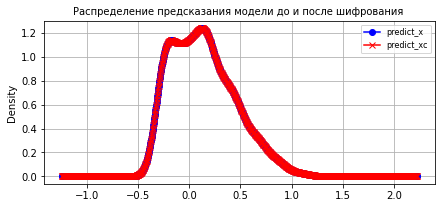

In [39]:
# Распределение предсказаний одинаковое
plt.figure(figsize=(7,3))
predict_x.plot(kind='kde', color = 'blue', marker='o', label = 'predict_x') #linestyle = 'dashed'
predict_xс.plot(kind='kde', color = 'red', marker='x', label = 'predict_xc')
plt.legend(fontsize=8)
plt.grid()
plt.title(f'Распределение предсказания модели до и после шифрования ', fontsize=10)
plt.show()

### Вывод 4
Подготовили данные:
- удалили явные дубликаты
- преобразовали тип данных для более качественного расчета
- выделили целевой признак
- написали функцию для генерирования обратной матрицы и преобразования домножением на нее матрицы исходных признаков
- проверили равенство исходной и дешифрованной матриц признаков
- подготовили ноборы выборок для обучения модели до и после шифрования матрицы признаков
Метод шифрованя работает корректно: проверили и убедились, что исходные признаки зашиврованы - по ним исходные данные не видны и их не получить без ключа - матрицы, обратной к той, на которую умножали при зашифровке.  
Таким образом, разработали такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию компании.
Построили модель и проверили метрику R2 на выборках до и после изменения (шифрования) матрицы признаков. В качестве выборок для этого брали сначала исходную матрицу признаков, затем - зашифрованную. 
Значения метрик совпали, разница ничтожно мала.

## Общий вывод  
Нами были изучены и преобразованы данные.  
Удалены 153 дубликаты, состовлявшие 3% данных.
Изменены для удобства вещественный на целый тип данных.
В данных 5000 объектов и 5 признаков их описывающих.  
Заголовки колонок и содержание данных корректны.  
Признаки в данных количественные (признак Пол имеет тип (int) и значения (0, 1), характерные для количественных признаков, кодировать в таком виде его не имеет смысла, хоть он и относится к качественным по смыслу).   
Большинство признаков распределены ненормально, есть выбросы.  
Пропусков и мультиколлинеарных признаков нет.   
Обнаружили среднюю корреляцию признака Возраст с целевым признаком Выплаты(0,65).

Далее доказали, что векторы предсказаний до и после преобразования совпадают, следовательно, при умножении справа матрицы признаков на обратимую матрицу качество линейной регрессии не изменится. То есть такой метод защиты данных подходит для решения поставленной задачи.

Описали алгоритм преобразования данных.  
Он включает в себя генерацию обратимой матрицы, проверку ее обратимости и корректного шифрования признаков, построение линейной регрессии и сравнения метрики R2 до и после преобразования матрицы признаков.


Подготовили данные:
- удалили явные дубликаты
- преобразовали тип данных для более качественного расчета
- выделили целевой признак
- написали функцию для генерирования обратной матрицы и преобразования домножением на нее матрицы исходных признаков
- проверили равенство исходной и дешифрованной матриц признаков
- подготовили наборы выборок для обучения модели до и после шифрования матрицы признаков
Метод шифрованя работает корректно: проверили и убедились, что исходные признаки зашиврованы - по ним исходные данные не видны и их не получить без ключа - матрицы, обратной к той, на которую умножали при зашифровке.  


Построили модель на отмасштабированных признаках и проверили метрику R2 на выборках до и после изменения (шифрования) матрицы признаков. В качестве выборок для этого брали сначала исходную матрицу признаков, затем - зашифрованную. Распределения предсказаний совпали.
Значения метрик также совпали.

Нами была выполнена основная задача: разработан и проверен надежный метод преобразования данных для защиты данных компании "Хоть потоп", чтобы по ним было сложно восстановить персональную информацию компании. При этом методе качество моделей машинного обучения не ухудшилось, а по ключу, при необходимости,  можно восстановить исходные данные клиентов.  
Компании можно порекомндовать его использовать, а также посмотреть, как можно избежать дубликатов в базе данных, которые могли возникнуть при некорректной работе с данными при выгрузках из базы данных, обновлениях и прочее. 

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x ]  Весь код выполняется без ошибок
- [x ]  Ячейки с кодом расположены в порядке исполнения
- [x ]  Выполнен шаг 1: данные загружены
- [x ]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [ x]  Вариант обоснован
- [x ]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x ]  Алгоритм описан
    - [x ]  Алгоритм обоснован
- [x ]  Выполнен шаг 4: алгоритм проверен
    - [x ]  Алгоритм реализован
    - [x ]  Проведено сравнение качества моделей до и после преобразования